In [13]:
import pandas as pd
import pickle
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os, pickle
import datetime

In [31]:
def table_parser(page):
    file = open(page)
    # page = page.split('\n')
    table = []
    num = 0
    for line in file:
        if 'Grade' in line:
            num += 1
        if num > 0 and len(line.split())!=0:
            num += 1
        if 3 <= num < 21:
            # line = line.rstrip()
            if len(line.split())!=0:
                split_line = line.split(' ')
                split_line = [x for x in split_line if x != '']
                strip_line = split_line[:16]
                table.append(strip_line)
    df = pd.DataFrame(table)
    df.drop([0,1,2,3,4,6,7,8,9,11,12,13,14],axis=1,inplace=True)
    df.drop([15,16,17],inplace=True)
    df.columns = ['WG', 'WL', 'WS']
    df.index = range(1,16)
    
    file.close()
    return df

In [3]:
#list(table_parser('docs/AK/007,007,AK,Ancorage/09Sep1997/AK-007,007,AK,Ancorage-09Sep1997.html')['WG'])

In [4]:
# test = pd.DataFrame(test_df)

In [32]:
dic = {}
for state in os.listdir('docs'):
    dic[state] = {}
    for county in os.listdir('docs/'+state):
        
        name = county.split(',')[3]
        dic[state][name] = {}
        for date in os.listdir('docs/'+state+'/'+county):
            date_obj = datetime.datetime.strptime(date, '%d%b%Y')
            try:
                dic[state][name][date_obj] = {}
                temp = table_parser('docs/{}/{}/{}/{}-{}-{}.html'.format(state, county, date,state, county, date))
                dic[state][name][date_obj]['WG'] = list(temp['WG'])
                dic[state][name][date_obj]['WL'] = list(temp['WL'])
                dic[state][name][date_obj]['WS'] = list(temp['WS'])
            except ValueError:
                print(state, county, date)

AZ 009,009,RUS,Gila County 07May1996
AZ 009,009,RUS,Yavapai County 07May1996
AZ 010,010,RUS,Graham County 07May1996
AZ 010,010,RUS,Greenlee County 07May1996
NY 097,097,RUS,Madison County 01May1997
NY 097,097,RUS,Madison County 01May2001
NY 097,097,RUS,Madison County 12Apr2016
NY 097,097,RUS,Madison County 14Apr2015
NY 097,097,RUS,Madison County 15Apr2014
NY 097,097,RUS,Madison County 16Apr2013
NY 097,097,RUS,Madison County 17Apr2012
NY 097,097,RUS,Madison County 18Apr2000
NY 097,097,RUS,Madison County 19Apr2011
NY 097,097,RUS,Madison County 20Apr1999
NY 097,097,RUS,Madison County 20Apr2010
NY 097,097,RUS,Madison County 21Apr2009
NY 097,097,RUS,Madison County 22Apr2008
NY 097,097,RUS,Madison County 23Apr1998
NY 097,097,RUS,Madison County 24Apr2007
NY 097,097,RUS,Madison County 25Apr2006
NY 097,097,RUS,Madison County 26Apr1996
NY 097,097,RUS,Madison County 26Apr2005
NY 097,097,RUS,Madison County 27Apr2004
NY 097,097,RUS,Madison County 29Apr2003
NY 097,097,RUS,Madison County 30Apr2002


In [6]:
# pickle.dump( dic, open( "dic.p", "wb" ) )
# dic = {'A': {'a': {1: [2,3,4,5,6],
#    ...:                           2: [2,3,4,5,6]},
#    ...:                     'b': {1: [2,3,4,5,6],
#    ...:                           2: [2,3,4,5,6]}},
#    ...:               'B': {'a': {1: [2,3,4,5,6],
#    ...:                           2: [2,3,4,5,6]},
#    ...:                     'b': {1: [2,3,4,5,6],
#    ...:                           2: [2,3,4,5,6]}}}

In [34]:
reform = {(level1_key, level2_key, level3_key,level4_key): values
           for level1_key, level2_dict in dic.items()
           for level2_key, level3_dict in level2_dict.items()
           for level3_key, level4_dict in level3_dict.items()
#            for level4_key, level5_dict in level4_dict.items()
#            for level5_key, values      in level5_dict.items()
           for level4_key, values      in level4_dict.items()}

In [35]:
# test = pd.DataFrame(reform, index=[0])
pay = pd.DataFrame(reform).T


In [39]:
pay.index.set_names(['State', 'County', 'Date', 'Scale'], inplace=True)

In [10]:
# pay

In [45]:
pickle.dump( pay, open( "pay.p", "wb" ) )

In [2]:
pay = pickle.load( open( "pay.p", "rb" ) )

https://stackoverflow.com/questions/17921010/how-to-query-multiindex-index-columns-values-in-pandas

In [74]:
pay[9].describe()

count    194592.000000
mean         26.166799
std           5.681544
min          11.130000
25%          21.900000
50%          25.990000
75%          30.030000
max          46.490000
Name: 9, dtype: float64

In [38]:
for i in range(15):
    pay[i] = pay[i].apply(lambda x: float_and_strip(x))

None
None
None
None






In [37]:
def float_and_strip(cell):
    try:
        cell = cell.replace('<U>', '')
        cell = cell.replace('</U>', '')
        cell = cell.replace('*', '')
        return float(cell)
    except:
        print(cell)
        

In [38]:
'<U>13.56</U>'[3:-4]

'13.56'

In [41]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 194592 entries, (AK, Ancorage, 1996-09-10 00:00:00, WG) to (WY, Washakie County, 2016-03-15 00:00:00, WS)
Data columns (total 15 columns):
0     194586 non-null float64
1     194592 non-null float64
2     194592 non-null float64
3     194592 non-null float64
4     194592 non-null float64
5     194592 non-null float64
6     194592 non-null float64
7     194592 non-null float64
8     194592 non-null float64
9     194592 non-null float64
10    194592 non-null float64
11    194592 non-null float64
12    194592 non-null float64
13    194592 non-null float64
14    194592 non-null float64
dtypes: float64(15)
memory usage: 23.4+ MB


In [43]:
pay.columns = range(1,16)
pay.head()

1      2      3      4      5      6   \
State County   Date       Scale                                             
AK    Ancorage 1996-09-10 WG     14.75  15.88  17.01  18.13  19.26  20.40   
                          WL     16.23  17.47  18.72  19.95  21.19  22.43   
                          WS     22.22  23.35  24.48  25.60  26.73  27.87   
               1997-09-09 WG     14.78  15.94  17.10  18.26  19.42  20.57   
                          WL     16.26  17.53  18.82  20.08  21.36  22.64   

                                    7      8      9      10     11     12  \
State County   Date       Scale                                             
AK    Ancorage 1996-09-10 WG     21.53  22.65  23.78  24.91  26.04  27.16   
                          WL     23.68  24.91  26.15  27.40  28.65  29.88   
                          WS     29.00  30.12  31.25  32.38  32.87  33.50   
               1997-09-09 WG     21.73  22.89  24.05  25.21  26.36  27.53   
                          WL     23.90  25.18  26.45  27.73  29.00  30.28   

                                    13     14     15  
State County   Date       Scale                       
AK    Ancorage 1996-09-10 WG     28.29  29.42  30.55  
                          WL     31.12  32.37  33.61  
                          WS     34.29  35.24  36.32  
               1997-09-09 WG     28.68  29.84  31.00  
                          WL     31.55  32.82  34.10

In [5]:
pay.loc['AK'].head()

1      2      3      4      5      6      7   \
County   Date      Scale                                                    
Ancorage 09Sep1997 WG     14.78  15.94  17.10  18.26  19.42  20.57  21.73   
                   WL     16.26  17.53  18.82  20.08  21.36  22.64  23.90   
                   WS     22.34  23.50  24.66  25.82  26.98  28.13  29.29   
         09Sep2008 WG     15.76  17.64  19.54  21.43  23.34  25.22  27.12   
                   WL     17.31  19.39  21.50  23.56  25.67  27.75  29.83   

                             8      9      10     11     12     13     14  \
County   Date      Scale                                                    
Ancorage 09Sep1997 WG     22.89  24.05  25.21  26.36  27.53  28.68  29.84   
                   WL     25.18  26.45  27.73  29.00  30.28  31.55  32.82   
                   WS     30.45  31.61  32.77  33.29  33.96  34.80  35.80   
         09Sep2008 WG     29.03  30.92  32.83  34.70  36.63  38.50  40.42   
                   WL     31.92  34.00  36.09  38.17  40.26  42.35  44.45   

                             15  
County   Date      Scale         
Ancorage 09Sep1997 WG     31.00  
                   WL     34.10  
                   WS     36.95  
         09Sep2008 WG     42.29  
                   WL     46.54

In [6]:
pay[1].head()

State  County    Date       Scale
AK     Ancorage  09Sep1997  WG       14.78
                            WL       16.26
                            WS       22.34
                 09Sep2008  WG       15.76
                            WL       17.31
Name: 1, dtype: float64

In [63]:
pay2016.xs('PR', level='State')


County         Date        Scale
Adjuntas       2016-09-13  WG       18.65
                           WL       22.35
                           WS       29.84
Aguada         2016-09-13  WG       18.65
                           WL       22.35
                           WS       29.84
Aguadilla      2016-09-13  WG       18.65
                           WL       22.35
                           WS       29.84
Aguas Buenas   2016-09-13  WG       18.65
                           WL       22.35
                           WS       29.84
Aibonito       2016-09-13  WG       18.65
                           WL       22.35
                           WS       29.84
Anasco         2016-09-13  WG       18.65
                           WL       22.35
                           WS       29.84
Arecibo        2016-09-13  WG       18.65
                           WL       22.35
                           WS       29.84
Arroyo         2016-09-13  WG       18.65
                           WL       22.35
 

In [46]:
pay.loc[(pay.index.get_level_values('Date').year == 1996) & (pay.index.get_level_values('State') == 'MS')]

1      2      3      4      5   \
State County            Date       Scale                                      
MS    Adams County      1996-04-09 WG      7.50   8.55   9.59  10.61  11.63   
                                   WL      8.25   9.40  10.54  11.66  12.79   
                                   WS     12.56  13.57  14.59  15.62  16.56   
      Alcorn County     1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
      Amite County      1996-04-09 WG      7.50   8.55   9.59  10.61  11.63   
                                   WL      8.25   9.40  10.54  11.66  12.79   
                                   WS     12.56  13.57  14.59  15.62  16.56   
      Attala County     1996-04-09 WG      7.50   8.55   9.59  10.61  11.63   
                                   WL      8.25   9.40  10.54  11.66  12.79   
                                   WS     12.56  13.57  14.59  15.62  16.56   
      Benton County     1996-04-09 WG      8.37   9.33  10.28  11.22  12.17   
                                   WL      9.23  10.26  11.31  12.34  13.40   
                                   WS     13.46  14.40  15.36  16.30  17.25   
      Bolivar County    1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
      Calhoun County    1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
      Carroll County    1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
      Chickasaw County  1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
      Choctaw County    1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
...                                         ...    ...    ...    ...    ...   
      Union County      1996-04-09 WG      8.37   9.33  10.28  11.22  12.17   
                                   WL      9.23  10.26  11.31  12.34  13.40   
                                   WS     13.46  14.40  15.36  16.30  17.25   
      Walthall County   1996-04-09 WG      7.50   8.55   9.59  10.61  11.63   
                                   WL      8.25   9.40  10.54  11.66  12.79   
                                   WS     12.56  13.57  14.59  15.62  16.56   
      Warren County     1996-04-09 WG      7.50   8.55   9.59  10.61  11.63   
                                   WL      8.25   9.40  10.54  11.66  12.79   
                                   WS     12.56  13.57  14.59  15.62  16.56   
      Washington County 1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
      Wayne County      1996-04-24 WG      9.08   9.97  10.85  11.74  12.63   
                                   WL      9.99  10.96  11.94  12.91  13.89   
                                   WS     14.20  15.09  15.97  16.84  17.68   
      Webster County    1996-04-25 WG      8.22   8.63   9.20   9.75  10.34   
                                   WL      8.86   9.50  10.13  10.74  11.36   
                                   WS     12.03  12.58  13.14  13.72  14.32   
      Wilkinson 

In [22]:
datetime.datetime.strptime('09Sep1997', '%d%b%Y')

1997

In [19]:
import arrow
arrow.get('09Sep1997').date()

datetime.date(1997, 1, 1)

In [29]:
pd.datetime('09Sep1997')

TypeError: an integer is required (got type str)

In [73]:
pay2016 = pay.loc[(pay.index.get_level_values('Date').year == 2016)][12].drop('PR')

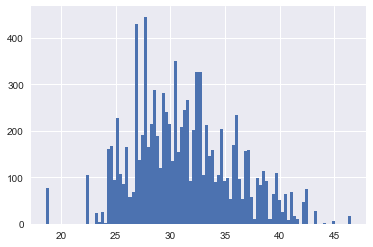

In [57]:
pay2016.hist(bins=100)

In [76]:
pay2016.median()

33.78

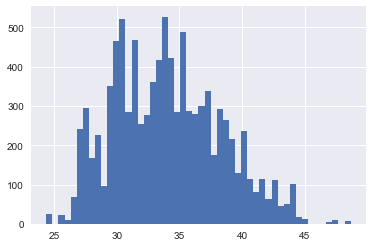

In [74]:
pay2016.hist(bins=50)

In [62]:
pay2016.index

MultiIndex(levels=[['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], ['Abbeville County', 'Acadia Parish', 'Accomack County', 'Ada County', 'Adair County', 'Adams County', 'Addison County', 'Adjuntas', 'Aguada', 'Aguadilla', 'Aguas Buenas', 'Aibonito', 'Aiken County', 'Aitkin County', 'Alachua County', 'Alamance County', 'Alameda County', 'Alamosa County', 'Albany County', 'Albemarle County', 'Alcona County', 'Alcorn County', 'Alexander County', 'Alexandria city', 'Alfalfa County', 'Alger County', 'Allamakee County', 'Allegan County', 'Allegany County', 'Alleghany County', 'Allegheny County', 'Allen County', 'Allen Parish', 'Allendale County', 'Alpena County', 'Alpine County', 'Amador County', 'Amelia County', 'Amherst County'